# Mall customer segmentation

Customer segmentation at a mall using K-means.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df = df.rename(columns = {'Genre':'Gender'})

In [22]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [23]:
df.shape

(200, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [25]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- There are no null values in the dataset, however the CustomerID feature is not necessary to perform a K-means segmentation, so this feature should be dropped

In [26]:
df.drop(["CustomerID"], axis=1, inplace = True)

KeyError: "['CustomerID'] not found in axis"

In [27]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


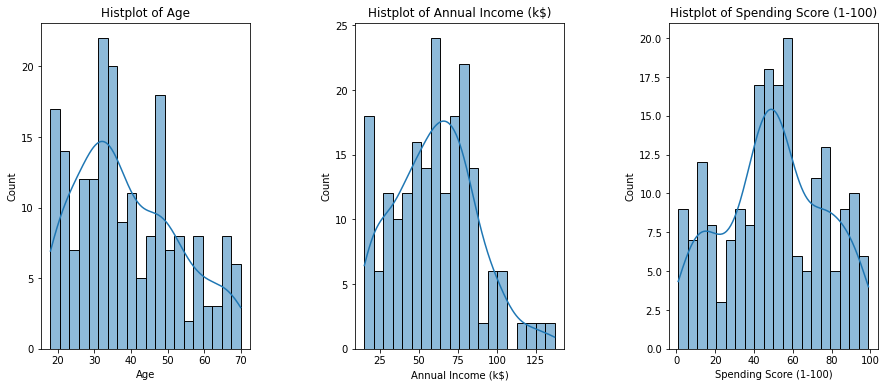

In [28]:
plt.figure(1, figsize=(15,6))
n=0

for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title(f"Histplot of {x}")
    
plt.show()

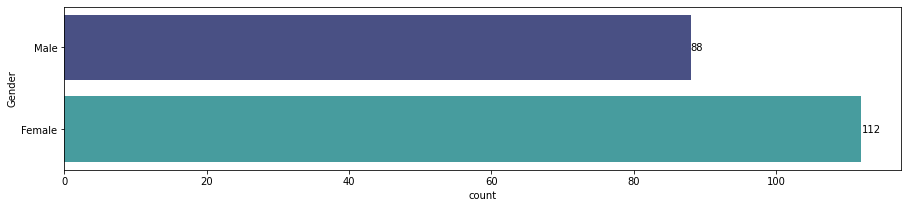

In [34]:
plt.figure(figsize=(15,3))
ax = sns.countplot(y="Gender", data=df, palette="mako")
ax.bar_label(ax.containers[0]);

- The countplot shows that there are 112 Female and 88 Male customers

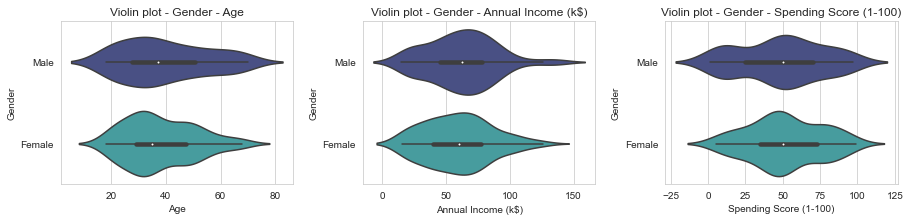

In [45]:
plt.figure(1, figsize=(15,3))
n=0
for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n +=1
    plt.subplot(1,3,n)
    sns.set_style("whitegrid")
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    sns.violinplot(x = cols, y = "Gender", data=df, palette='mako')
    plt.title(f"Violin plot - Gender - {cols}")
    
plt.show()

### Age brackets

In [13]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age >= 55)]


In [14]:
agex = ['18-25', '26-35', '36-45', '46-55', '55+']
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]


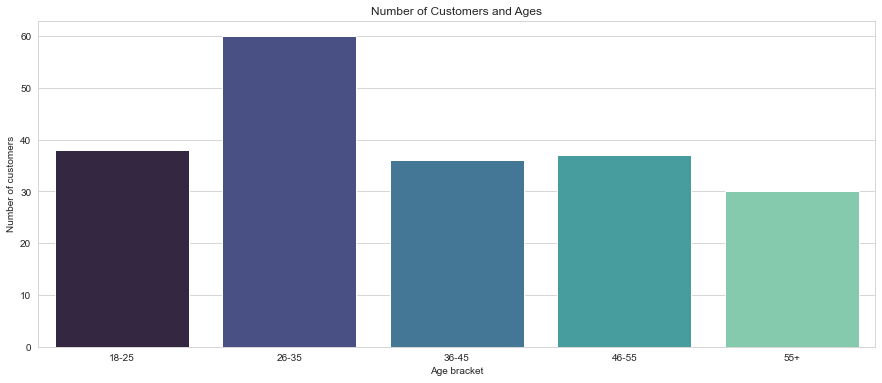

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x = agex, y = agey, palette="mako")
plt.title("Number of Customers and Ages")
plt.xlabel("Age bracket")
plt.ylabel("Number of customers")
plt.show()

### Annual income and spending score correlation

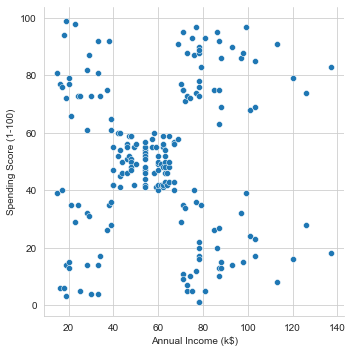

In [16]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

- There is some relationship between people with an annual income of 40-60k has a spending score between 40-60

### Spending Score

In [17]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) &(df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) &(df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) &(df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) &(df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) &(df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

In [18]:
len(ss_1_20.values)

36

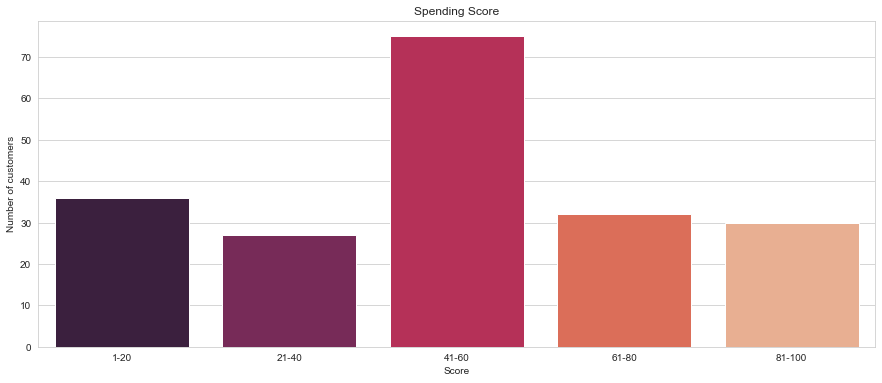

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of customers")
plt.show()

### Annual income

In [20]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]


ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
len(ai0_30.values)

32

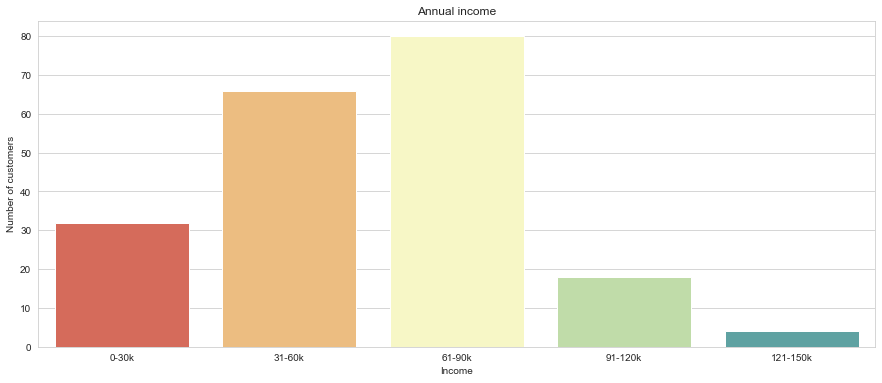

In [21]:
aix = ["0-30k", "31-60k", "61-90k", "91-120k", "121-150k"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual income")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()

# KMeans

In [38]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values
X1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

WCSS = Within-Cluster Sum of Square
- It is the sum of squared distance between each point and the centroid of the cluster

In [39]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
    

**Find the optimal number of clusters**

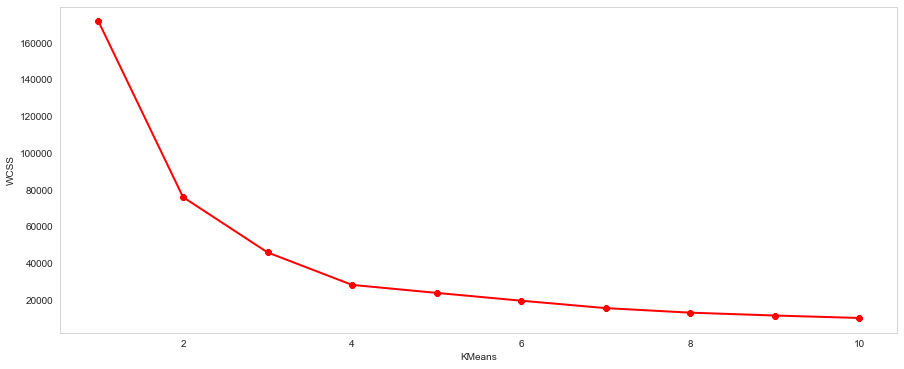

In [40]:
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("KMeans")
plt.ylabel("WCSS")
plt.show()

***The optimal number of clusters is 4***

In [41]:
kmeans = KMeans(n_clusters=4)

In [42]:
label = kmeans.fit_predict(X1)
label

array([3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [43]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


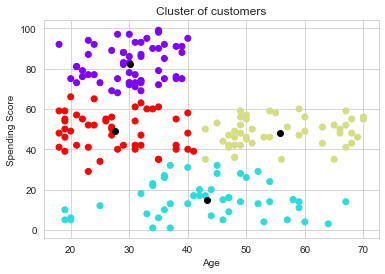

In [44]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Cluster of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

## Annual Income, Spending Score

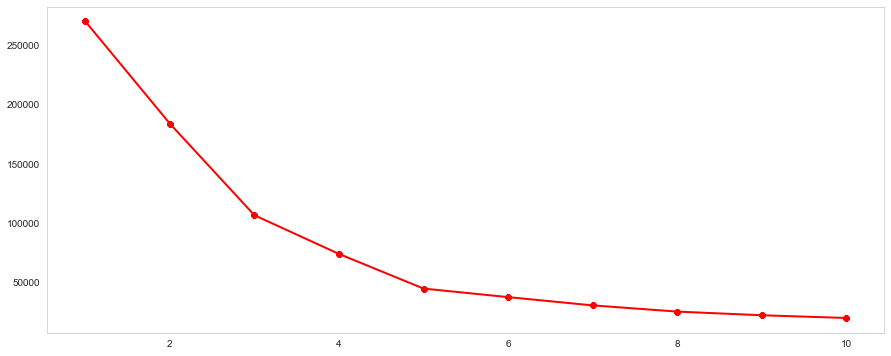

In [45]:
X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values


from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="red", marker="8")

plt.show()

In [46]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [47]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


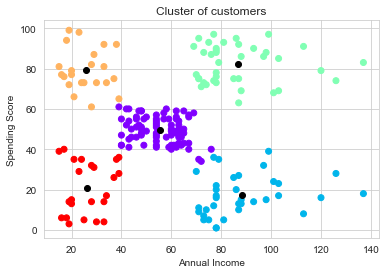

In [48]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

**Consider Age, Annual Income and Spending Score together**

In [49]:
X3 = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


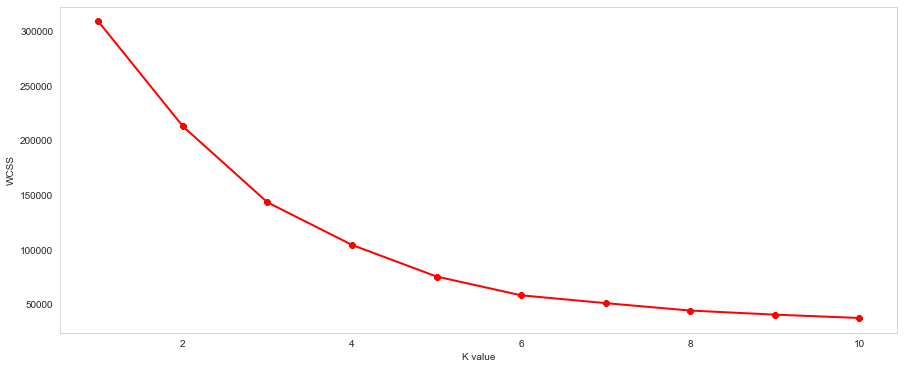

In [50]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [51]:
kmeans= KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 3 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [52]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]
 [42.9375     55.0875     49.7125    ]
 [40.66666667 87.75       17.58333333]]


We have three variables and therefore have 3 columns

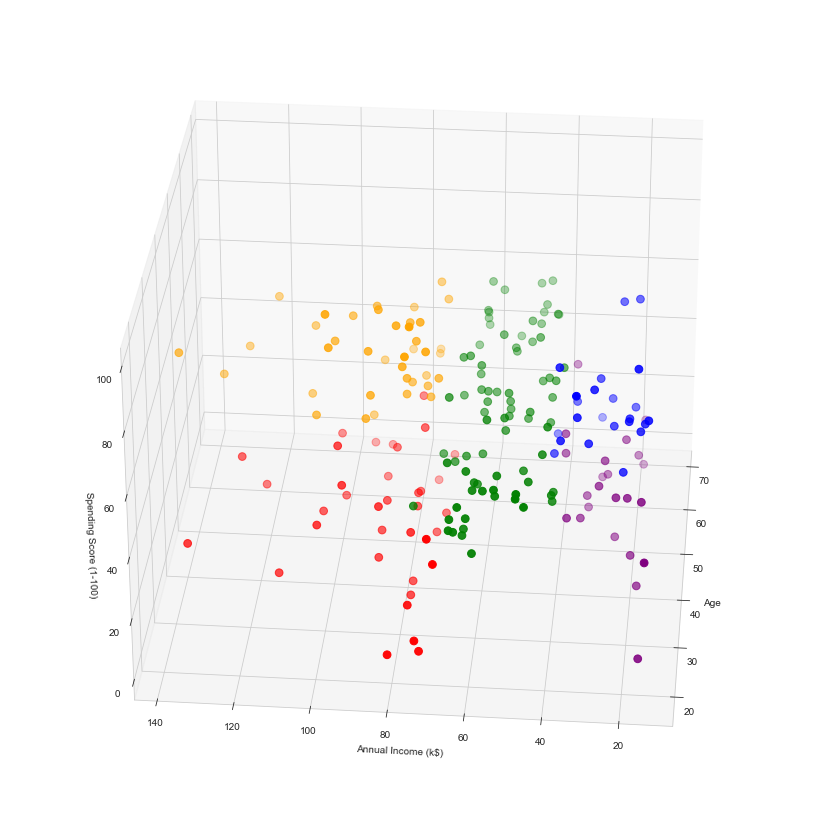

In [53]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c="blue", s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c="red", s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c="orange", s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c="green", s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c="purple", s=60)


ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()
